dataset  Consumo sustancias   Argentina 2022  tiene  562 columnas y 12000 filas

In [8]:
import pandas as pd
url = 'https://drive.google.com/uc?id=1MwJRQi1BC82ZMu50HL1Q9_rDRZxP6N3D'

df = pd.read_csv(url,sep=';', on_bad_lines='skip')
# Rellenar valores nulos 
df = df.fillna(0)  # Rellenar con 0
# Ver las primeras filas del DataFrame
print(df.head())

# Obtener el número de filas y columnas
num_filas, num_columnas = df.shape

print(f"El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")

C:\Users\danie\AppData\Local\Temp\ipykernel_6548\3177978847.py:6: DtypeWarning: Columns (175,176,206,207,276,381,382,383,396,397,424) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url,sep=';', on_bad_lines='skip')


   ID_PER   WPER  CANT_MIEMBROS_HOGAR  CANT_PERSONAS0A17  CLIMA_EDUCATIVO  \
0  336578    124                    1                  0                2   
1  305909    781                    1                  0                3   
2  358892  34193                    4                  1                2   
3  342664    968                    1                  0                3   
4  394688  11509                    2                  0                3   

   J_SEXO  J_EDAD  J_NIVEL_EDUCATIVO  SEXO_SEL  EDAD_SEL  ...  ID_06B  ID_06C  \
0       1      27                  4         1        27  ...       4       2   
1       1      33                  6         1        33  ...       2       2   
2       1      43                  4         2        19  ...       1       2   
3       2      51                  6         2        51  ...       1       4   
4       2      59                  5         1        31  ...       2       1   

   ID_06D  ID_06E  ID_06F  ID_06G  ID_06H  ID_06I 

#############            Utilizacion de lib Matplotlib     ##########################


grafico barras :  Cual es la cantidad y promedio de edad  por sexo de los encuestados ?

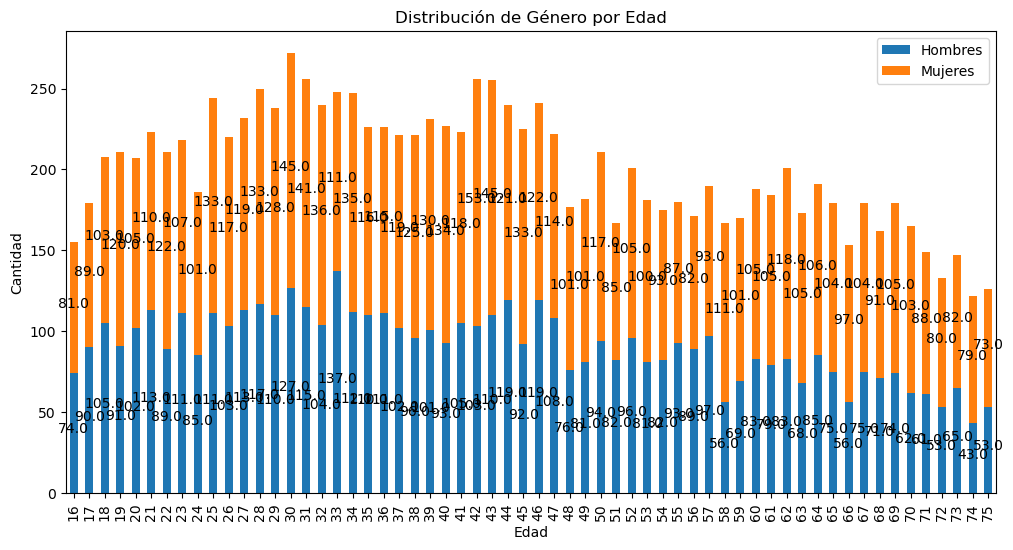

In [9]:
import matplotlib.pyplot as plt

# Filtrar por sexo válido (1 o 2)
df_filtrado = df[df['SEXO_SEL'].isin([1, 2])]

# Agrupar por edad y sexo, y contar
conteo_por_edad_y_sexo = df_filtrado.groupby(['EDAD_SEL', 'SEXO_SEL']).size().unstack()

# Crear un gráfico de barras apiladas
ax = conteo_por_edad_y_sexo.plot(kind='bar', stacked=True, figsize=(12, 6))

# Agregar títulos y etiquetas
plt.title('Distribución de Género por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.legend(['Hombres', 'Mujeres'])

# Añadir etiquetas en cada barra
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center')
# Mostrar el gráfico
plt.show()

///////   grafico por dispersion de burbujas  ///////////


Que nivel de educacion  tienen  los encuestados  segun sus edades  ?

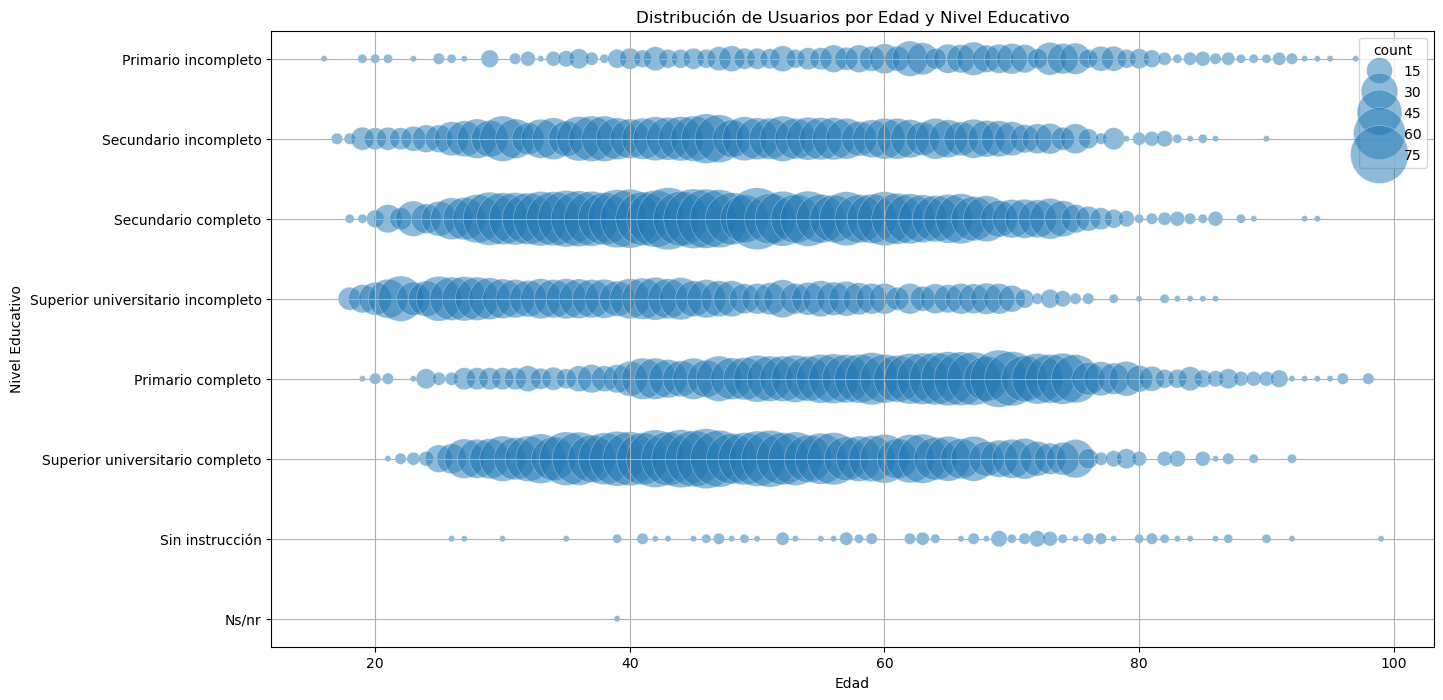

In [10]:
import seaborn as sns
# Agrupando los datos por edad y nivel educativo, y contando el número de usuarios en cada grupo
grouped_data = df.groupby(['J_EDAD', 'J_NIVEL_EDUCATIVO']).size().reset_index(name='count')

# Mapeo de los códigos de nivel educativo a sus nombres
niveles_educativos = {
    1: 'Primario incompleto',
    2: 'Primario completo',
    3: 'Secundario incompleto',
    4: 'Secundario completo',
    5: 'Superior universitario incompleto',
    6: 'Superior universitario completo',
    7: 'Sin instrucción',
    9: 'Ns/nr'
}

# Asignando los nombres a los niveles educativos en los datos
grouped_data['Nivel_Educativo_Nombre'] = grouped_data['J_NIVEL_EDUCATIVO'].map(niveles_educativos)

# Creando el diagrama de dispersión con burbujas
plt.figure(figsize=(15, 8))
sns.scatterplot(data=grouped_data, x='J_EDAD', y='Nivel_Educativo_Nombre', size='count', sizes=(20, 2000), alpha=0.5)

plt.title('Distribución de Usuarios por Edad y Nivel Educativo')
plt.xlabel('Edad')
plt.ylabel('Nivel Educativo')
plt.grid(True)
plt.show()

/////////////  grafico violin plot  ///////

que tipo de cobertura de salud tienen  los encuestados ??

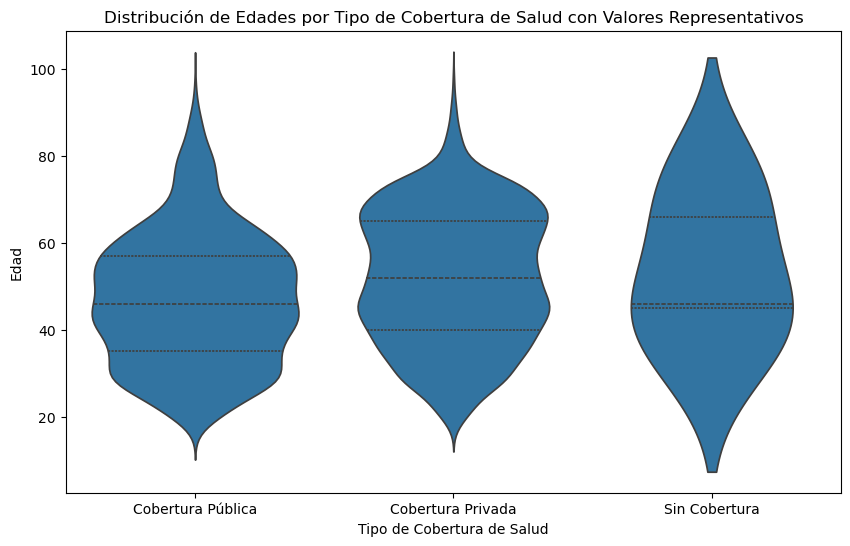

In [11]:
# Mapeo de los códigos de cobertura de salud a sus nombres
coberturas_salud = {
    1: 'Cobertura Privada',
    2: 'Cobertura Pública',
    9: 'Sin Cobertura'
}

# Asignando los nombres a las coberturas de salud en los datos
df['Cobertura_Salud'] = df['COBERTURA_SEL'].map(coberturas_salud)

# Creando el violin plot con valores representativos de cuartiles
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cobertura_Salud', y='J_EDAD', data=df, inner="quartile")

plt.title('Distribución de Edades por Tipo de Cobertura de Salud con Valores Representativos')
plt.xlabel('Tipo de Cobertura de Salud')
plt.ylabel('Edad')
plt.show()

#####################  Graficos con libreria seaborn #############################

como es la cobertura de salud de los encuestados ??

grafioc  lineal  

C:\Users\danie\AppData\Local\Temp\ipykernel_6548\1684455093.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencia_estado_salud = data_filtrada.groupby(['Grupo_Etareo', 'SA_03']).size().unstack(fill_value=0)


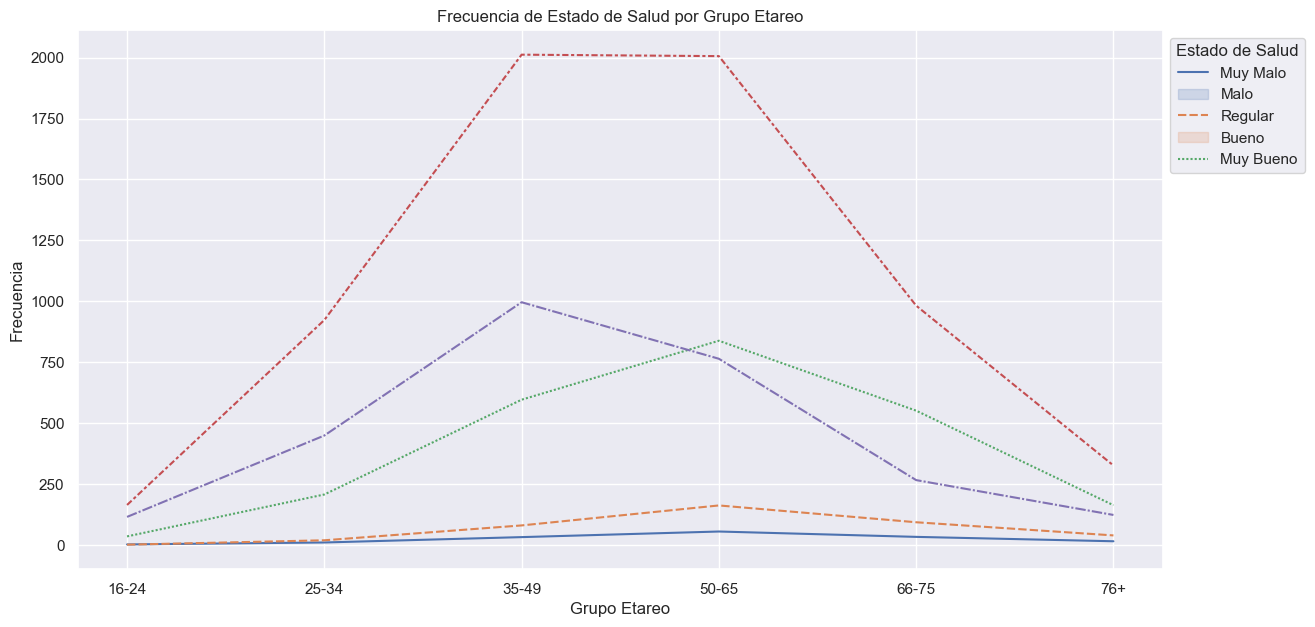

In [12]:
# Definimos los límites de los grupos etareos
bins = [15, 24, 34, 49, 65, 75, 100]
labels = ['16-24', '25-34', '35-49', '50-65', '66-75', '76+']
df['Grupo_Etareo'] = pd.cut(df['J_EDAD'], bins=bins, labels=labels, right=False)

# Filtramos los datos para excluir '99' que representa 'no sabe/no responde'
data_filtrada = df[df['SA_03'] != 99]

# Creamos un dataframe que contiene la frecuencia de cada estado de salud por grupo etareo
frecuencia_estado_salud = data_filtrada.groupby(['Grupo_Etareo', 'SA_03']).size().unstack(fill_value=0)

# Utilizamos Seaborn para crear el gráfico de líneas múltiples
sns.set_theme(style="whitegrid")  # Establecemos el tema de Seaborn con un fondo de cuadrícula
sns.set(rc={'figure.figsize':(14,7)})  # Ajustamos el tamaño de la figura
lineplot = sns.lineplot(data=frecuencia_estado_salud)
lineplot.set_title('Frecuencia de Estado de Salud por Grupo Etareo')
lineplot.set_xlabel('Grupo Etareo')
lineplot.set_ylabel('Frecuencia')
lineplot.legend(title='Estado de Salud', labels=['Muy Malo', 'Malo', 'Regular', 'Bueno', 'Muy Bueno'])

# Mostramos el gráfico
sns.move_legend(lineplot, "upper left", bbox_to_anchor=(1, 1))  # Movemos la leyenda fuera del gráfico
plt.show()

/////   grafico de barras 

utiliza medicamentos  para malestares   leves ? 

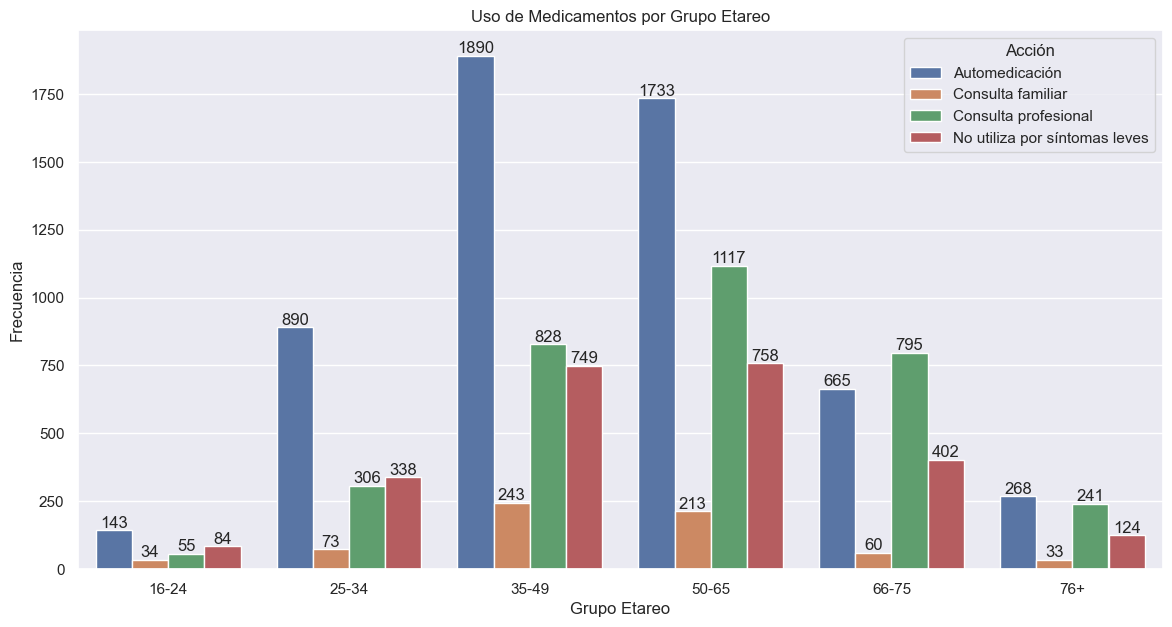

In [13]:

# Definimos los límites de los grupos etareos
bins = [15, 24, 34, 49, 65, 75, 100]
labels = ['16-24', '25-34', '35-49', '50-65', '66-75', '76+']
df['Grupo_Etareo'] = pd.cut(df['J_EDAD'], bins=bins, labels=labels, right=False)

# Evitamos el SettingWithCopyWarning creando una copia del DataFrame filtrado
data_filtrada = df[df['SA_08'] != 99].copy()

# Mapeamos los valores de la columna 'SA_08' a sus descripciones correspondientes
mapeo_acciones = {
    1: 'Consulta profesional',
    2: 'Consulta familiar',
    3: 'Automedicación',
    4: 'No utiliza por síntomas leves'
}
data_filtrada['SA_08'] = data_filtrada['SA_08'].map(mapeo_acciones)

# Creamos un DataFrame que contiene el conteo de las respuestas de 'SA_08' por grupo etareo
conteo_medicamentos = data_filtrada.groupby(['Grupo_Etareo', 'SA_08'], observed=True).size().reset_index(name='Frecuencia')

# Configuramos el tamaño del gráfico y el tema
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(14,7)})

# Creamos el gráfico de barras
barplot = sns.barplot(x='Grupo_Etareo', y='Frecuencia', hue='SA_08', data=conteo_medicamentos)

# Añadimos los valores a las barras
for container in barplot.containers:
    barplot.bar_label(container)

# Establecemos los títulos y etiquetas del gráfico
barplot.set_title('Uso de Medicamentos por Grupo Etareo')
barplot.set_xlabel('Grupo Etareo')
barplot.set_ylabel('Frecuencia')
barplot.legend(title='Acción')

////  grafico point plot 

como es el cosnumo de alcohol y tabaco en los distintos grupos etareos ?

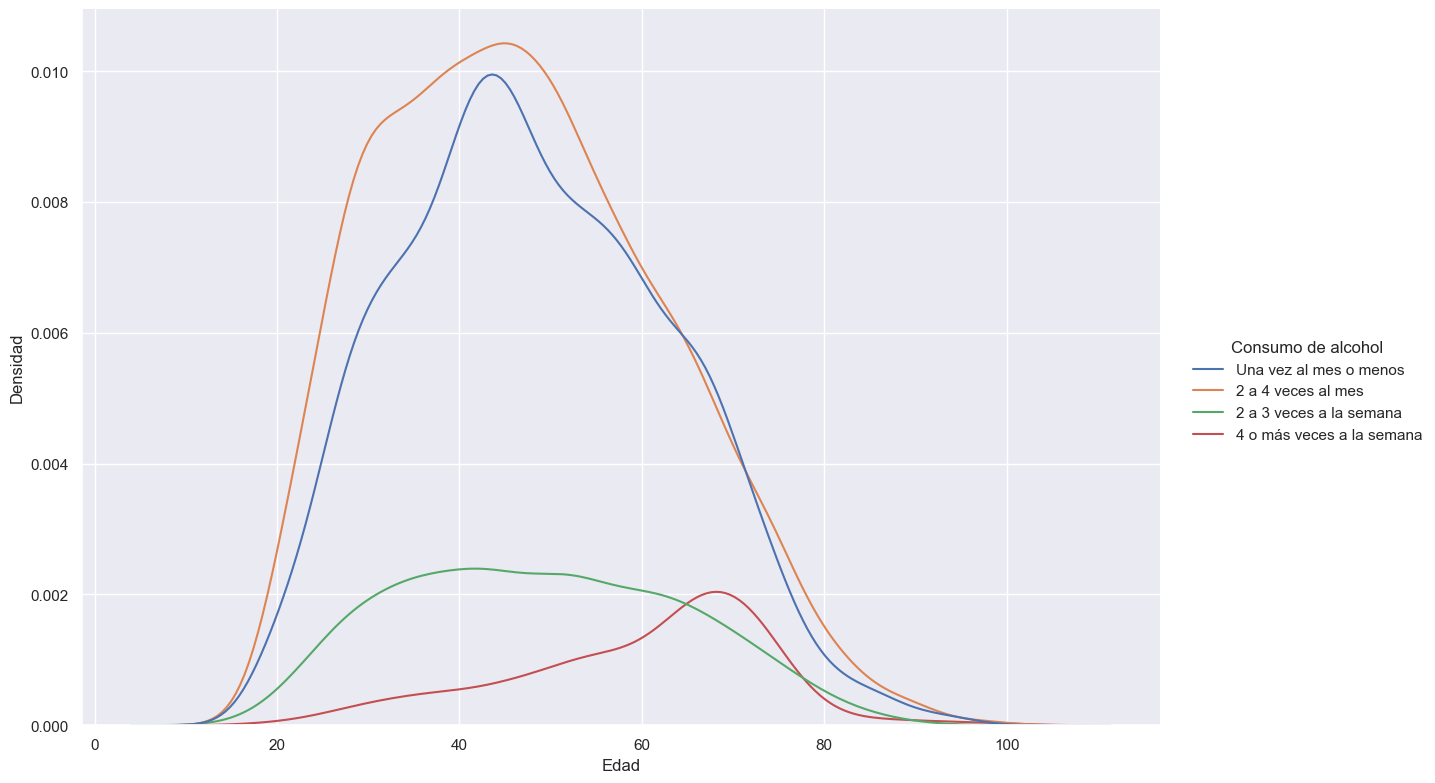

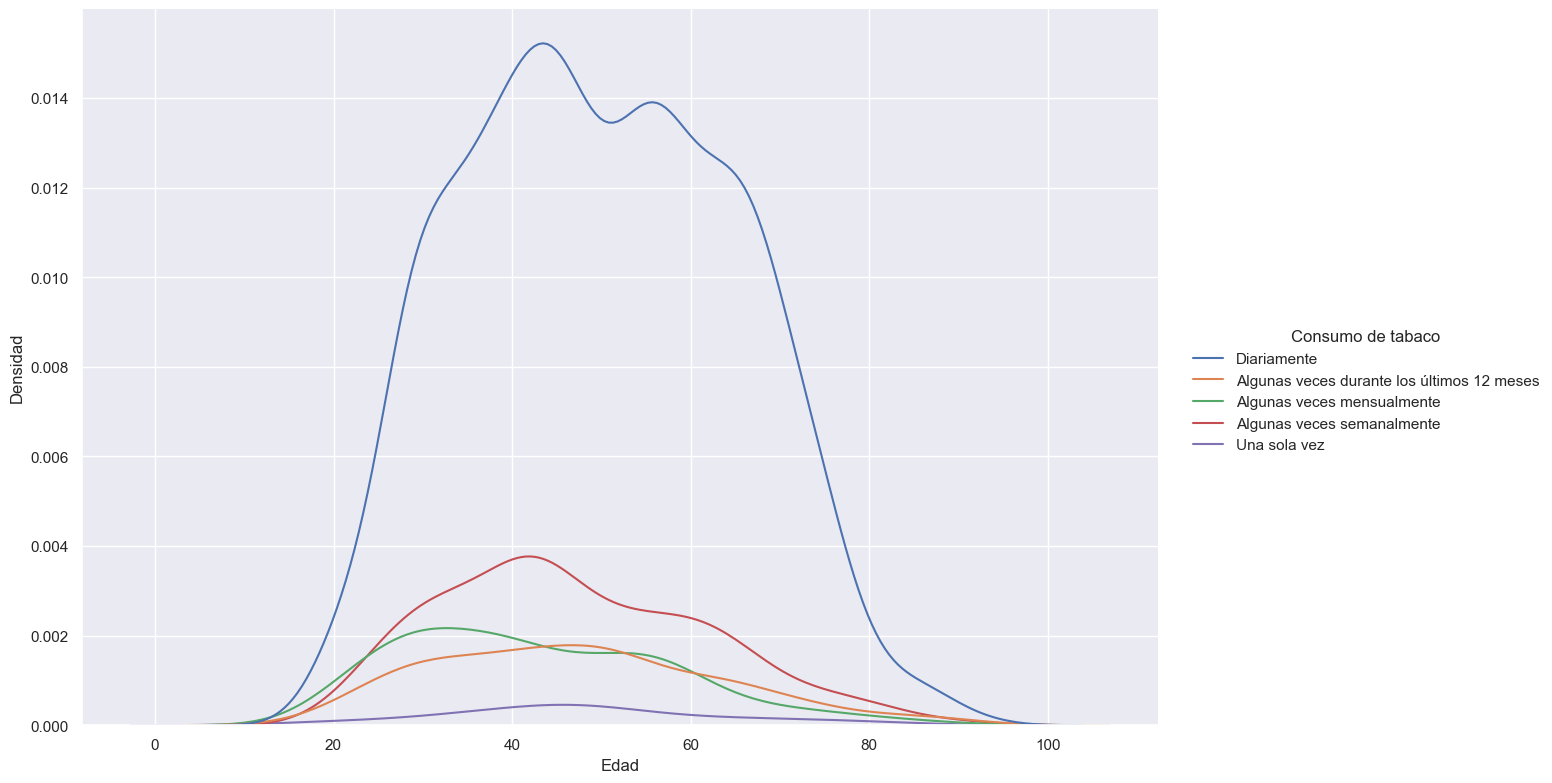

In [14]:
# Definimos los límites de los grupos etareos y sus etiquetas
bins = [15, 24, 34, 49, 65, 75, 100]
labels = ['16-24', '25-34', '35-49', '50-65', '66-75', '76+']
df['Grupo_Etareo'] = pd.cut(df['J_EDAD'], bins=bins, labels=labels, right=False)

# Mapeamos los valores de las columnas 'AL_05' y 'TA_06' a descripciones
# Esto es para asegurar que los distintos casos de consumo sean claros en el gráfico
consumo_alcohol_descripciones = {
    1: 'Una vez al mes o menos',
    2: '2 a 4 veces al mes',
    3: '2 a 3 veces a la semana',
    4: '4 o más veces a la semana'
}

consumo_tabaco_descripciones = {
    1: 'Una sola vez',
    2: 'Algunas veces durante los últimos 12 meses',
    3: 'Algunas veces mensualmente',
    4: 'Algunas veces semanalmente',
    5: 'Diariamente'
}

# Filtramos los datos para excluir '99' que representa 'no contesta' en ambas columnas
data_filtrada = df[(df['AL_05'] != 99) & (df['TA_06'] != 99)].copy()
data_filtrada['AL_05'] = data_filtrada['AL_05'].map(consumo_alcohol_descripciones)
data_filtrada['TA_06'] = data_filtrada['TA_06'].map(consumo_tabaco_descripciones)

# Graficamos la densidad del consumo de alcohol por edad
grafico_alcohol = sns.displot(data_filtrada, x='J_EDAD', hue='AL_05', kind='kde', height=8, aspect=1.5)
grafico_alcohol.set_axis_labels('Edad', 'Densidad')
grafico_alcohol._legend.set_title('Consumo de alcohol')

# Graficamos la densidad del consumo de tabaco por edad
grafico_tabaco = sns.displot(data_filtrada, x='J_EDAD', hue='TA_06', kind='kde', height=8, aspect=1.5)
grafico_tabaco.set_axis_labels('Edad', 'Densidad')
grafico_tabaco._legend.set_title('Consumo de tabaco')